# 
Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [129]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string


from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS


In [130]:
tweets_data = pd.read_csv(r"C:\Users\91863\Downloads\Elon_musk.csv")
tweets_data.drop("Unnamed: 0",axis=1,inplace=True)
tweets_data.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [131]:
tweets_data.columns

Index(['Text'], dtype='object')

In [132]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [133]:
tweets_data.isnull().sum()

Text    0
dtype: int64

In [134]:
tweets_data.shape

(1999, 1)

test preproceesing

In [135]:
import re #regular expresion
import string
def clean_text(Text):
    # make text lower case, remove text in square braces, remove punctuations and remove words containg numbers
    Text =Text.lower()
    Text = re.sub('\[.*?\]', '',Text)
    Text = re.sub('[%s]' % re.escape(string.punctuation),'',Text)
    Text = re.sub('\w*\d\w*', '',Text)
    Text = re.sub('[0-9" "]'," ",Text)
    Text = re.sub('[''""...]', '',Text)
    return Text

clean  = lambda x: clean_text(x)
tweets_data["Text"] = tweets_data.Text.apply(clean)    # data is cleaned
tweets_data["Text"]

0                                            i’m an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [137]:
# word frequency
freq = pd.Series(' '.join(tweets_data["Text"]).split()).value_counts()[:20]  # fro top 20
freq

the               483
to                396
is                349
a                 348
of                309
spacex            237
amp               216
in                213
for               190
tesla             166
will              164
be                156
erdayastronaut    142
this              139
it                136
we                135
on                128
rt                127
that              127
but               124
dtype: int64

In [138]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', '…', 'ajtourville', 'yes', 'rationaletienne', 'adamklotz', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'adamklotz', 'starlink', 'staggeringly', 'difficult', 'technical', 'amp', 'economic', 'endeavor', 'however', '…', 'rationaletienne', 'adamklotz', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', '…', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', '…', 'adamklotz', '’', 'meant', 'price', 'countries', 'difference', 'taxes', 'amp', 'shipping', 'tobyliiiiiiiiii', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'coindesk', 'tesla', 'danzpalmer', 'xprize', 'team', 'manage', 'carbon', 'capture', 'prize', 'sruhle', 'everyone', 'tesla', 'receives', 'stock', 'comp', 'stockoptions', 'take', 'table', '’', '’', 'missing', 'back', 'work', 'go'

In [139]:

#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
tweets_data["Text"] = tweets_data["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [141]:
# word frquency after removal od stopwords
freq_sw = pd.Series(''.join(tweets_data["Text"]).split()).value_counts()[:20]
freq_sw

amp                214
spacex             209
tesla              142
great               59
erdayastronaut      53
it’s                51
good                44
launch              43
would               37
first               37
like                35
nasaspaceflight     34
ppathole            33
also                33
yeah                32
probably            32
flcnhvy             31
one                 31
nasa                30
make                30
dtype: int64

In [143]:
# count vectoriser tells the frequnecy of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np  
vectorizer = CountVectorizer(min_df =1,max_df =0.9)
x= vectorizer.fit_transform(tweets_data["Text"])
word_freq_df  =pd.DataFrame({"term": vectorizer.get_feature_names_out(),"occurances":np.asarray(x.sum(axis=0)).ravel().tolist()})
word_freq_df["frequency"] = word_freq_df["occurances"]/np.sum(word_freq_df["occurances"])
# print(word)_freq_df.sort("occurances",ascendinng =False).head()

In [144]:
word_freq_df.head()

,term,occurances,frequency
0,aber,1,0.000074
1,able,6,0.000446
2,abo,1,0.000074
3,aboard,1,0.000074
4,abort,3,0.000223


In [146]:
#TF_IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = "english",max_features = 1000,max_df  = 0.5,smooth_idf = True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets_data["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns = names_features)

In [147]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# Ngram

In [149]:
# bi-gram
def get_top_n2_words(corpus,n = None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [151]:
top2_words = get_top_n2_words(tweets_data["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


C:\Users\91863\AppData\Local\Temp\ipykernel_3836\101937931.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week'),
 Text(15, 0, 'erdayastronaut flcnhvy'),
 Text(16, 0, 'they re'),
 Text(17, 0, 'flcnhvy tesla'),
 Text(18, 0, 'coming soon'),
 Text(19, 0, 'spacex dragon')]

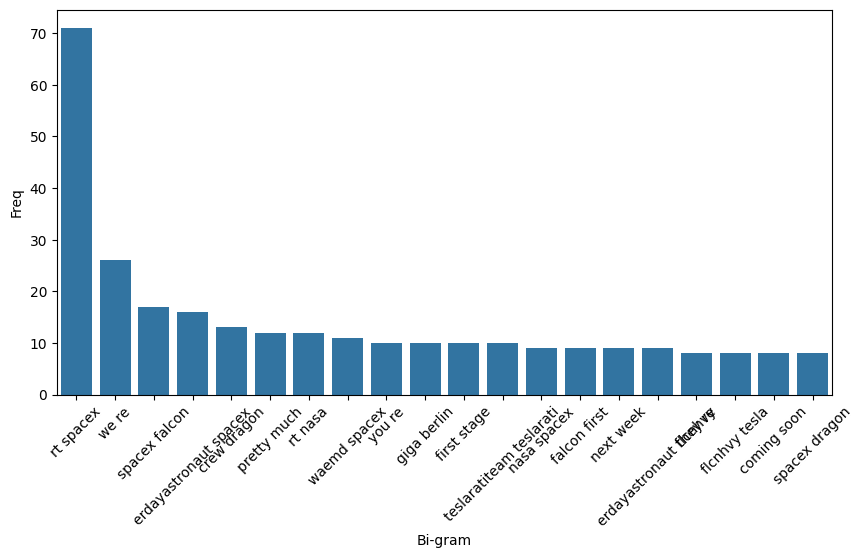

In [152]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

C:\Users\91863\AppData\Local\Temp\ipykernel_3836\101937931.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week'),
 Text(15, 0, 'erdayastronaut flcnhvy'),
 Text(16, 0, 'they re'),
 Text(17, 0, 'flcnhvy tesla'),
 Text(18, 0, 'coming soon'),
 Text(19, 0, 'spacex dragon')]

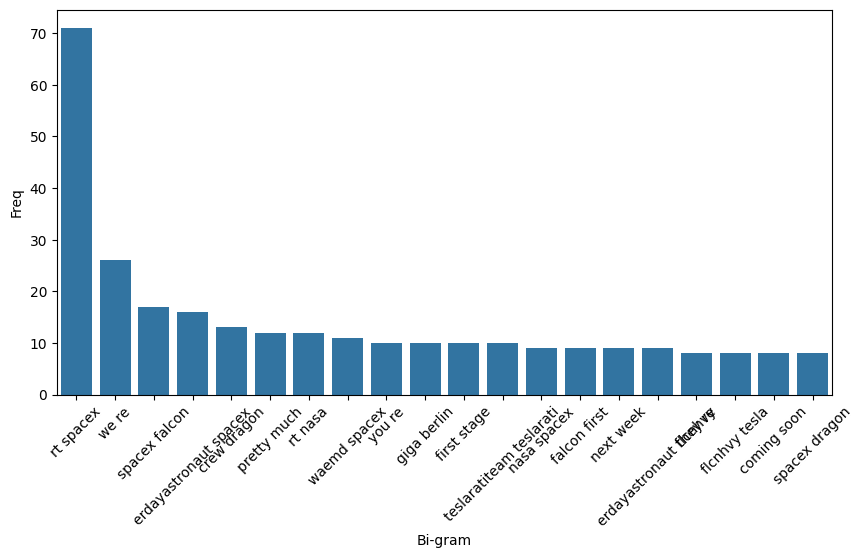

In [153]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [154]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [156]:
top3_words = get_top_n3_words(tweets_data["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [157]:
top3_df

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
...,...,...
195,completed full duration,2
196,raptor vacuum engine,2
197,we ve ever,2
198,zogfotpik samiralyateem idaacarmack,2


C:\Users\91863\AppData\Local\Temp\ipykernel_3836\3293085942.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

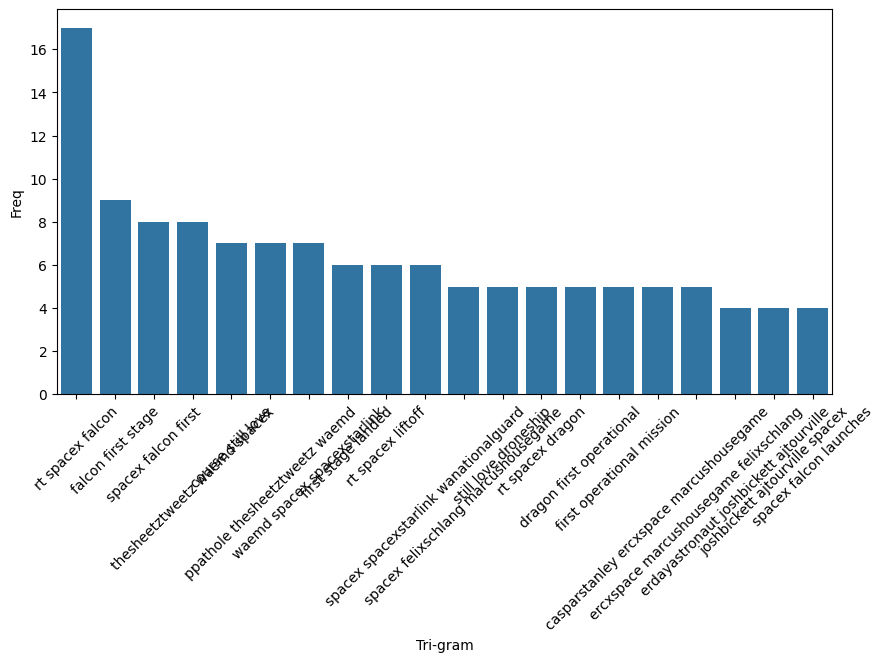

In [158]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [159]:
string_Total = " ".join(tweets_data["Text"])

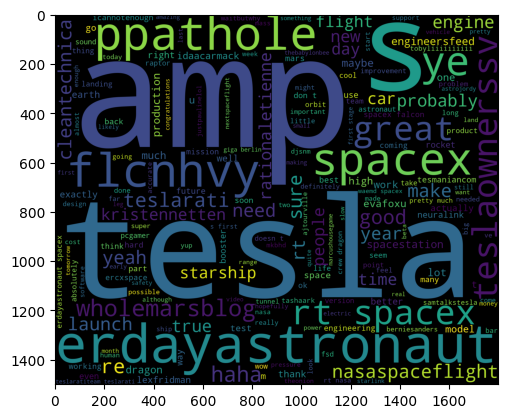

In [160]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black',width = 1800,height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw)

Subjectivity and Polarity

In [162]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ------------- ------------------------ 225.3/636.8 kB 6.9 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 6.6 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 4.4 MB/s eta 0:00:00


In [164]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets_data[["subjectivity", "polarity"]] = tweets_data.apply(sentiment_analysis, axis=1)
tweets_data.head(11)

,Text,subjectivity,polarity
0,i’m alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


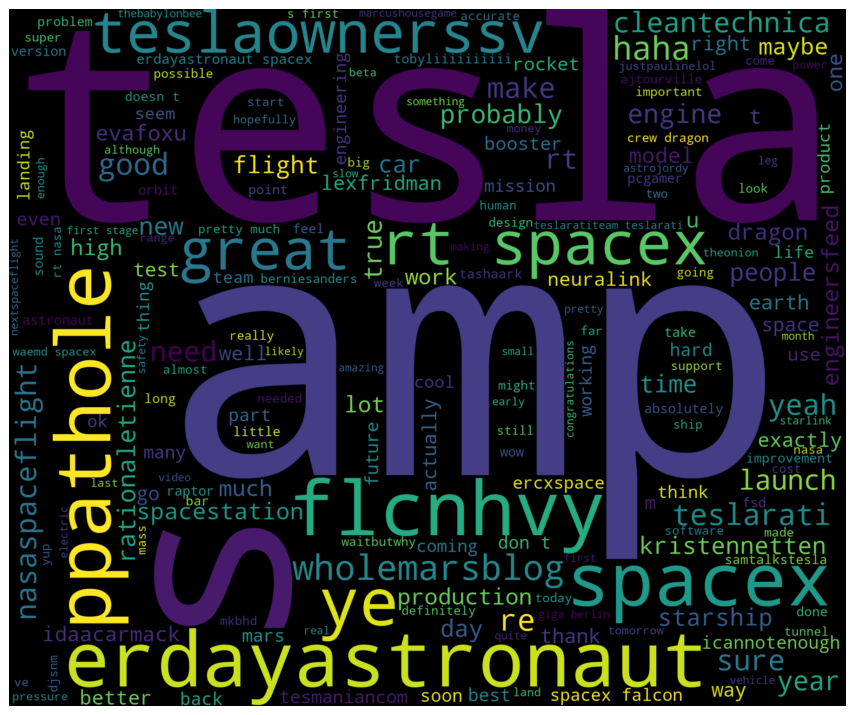

In [166]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets_data["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

sentiment analysis

In [167]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [169]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets_data["analysis"] = tweets_data["polarity"].apply(analysis)

In [171]:
positive_tweets = tweets_data[tweets_data['analysis'] == 'Positive']
negative_tweets = tweets_data[tweets_data['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -i’m alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however don…
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year or…


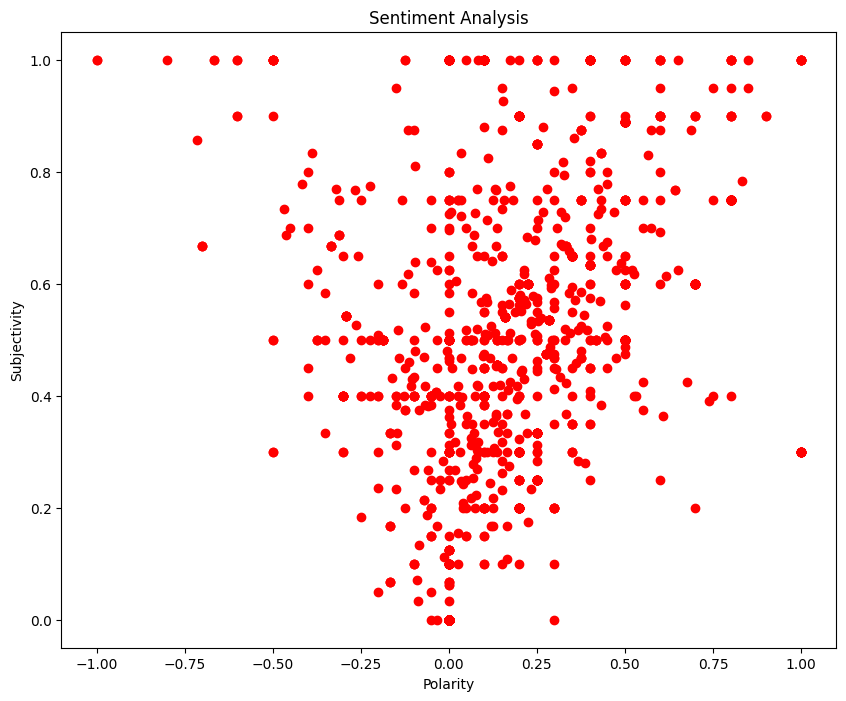

In [174]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets_data.shape[0]):
    plt.scatter(tweets_data["polarity"][i], tweets_data["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [175]:
(len(positive_tweets) / len(negative_tweets))*100

429.5918367346939

Conclusion:  the number is positve as well as high of a ratio, so we can say that elon musk is a positive guy